### Console Analyses

Analysing data from console epoch. Current state is only temporal sales series and visualization.

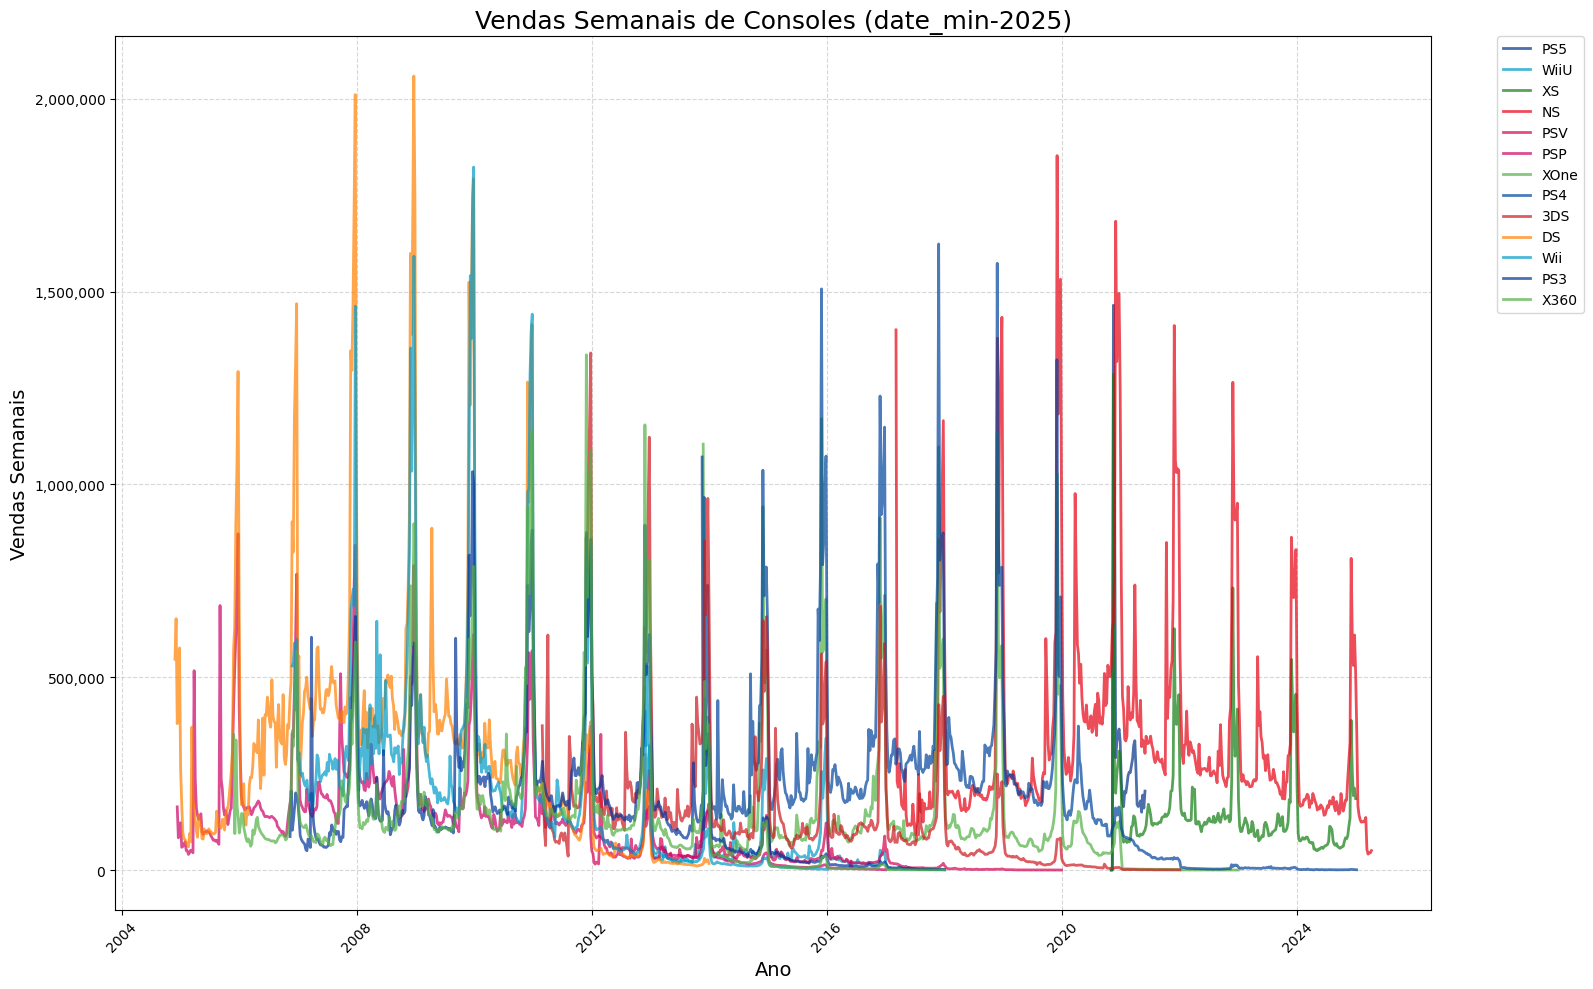

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
from datetime import datetime
from scipy.stats import norm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL


df = pd.read_csv('../data/console_weekly_sales.csv')

df['week'] = pd.to_datetime(df['week'])

consoles = ['PS5', 'WiiU', 'XS', 'NS', 'PSV', 'PSP', 'XOne', 'PS4', '3DS', 'DS', 'Wii', 'PS3', 'X360']
colors = ['#003087', '#009AC7', '#107C10', '#e60012', '#d70051', '#cc0066', '#52b043', '#00439c', '#ce181e', '#ff7f00', '#009ac7', '#003399', '#52b043']

plt.figure(figsize=(16, 10))

for console, color in zip(consoles, colors):
    console_data = df[df['console'] == console]

    plt.plot(console_data['week'], console_data['sales'],
             label=console, color=color, alpha=0.7, linewidth=2)

plt.title('Vendas Semanais de Consoles (date_min-2025)', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Vendas Semanais', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=10)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

### Console Tall-Thin Matrix Construction

In [2]:
consoles = ['PS5', 'XS', 'NS', 'PSV', 'XOne', 'PS4', 'WiiU','3DS', 'PS3', 'X360', 'Wii', 'PSP'] #except for WiiU
consoles.reverse()
last_console = df[df['console'] == 'DS'].set_index("week").rename(columns={"sales" : 'DS'}).get(['DS'])
for console in consoles:
    console_data = df[df['console'] == console].set_index("week").rename(columns={"sales" : console}).get([console])
    last_console = pd.concat([last_console,console_data], axis=1).fillna(0)
    
last_console.to_csv('../data/console_matrix.csv',index=True)
last_console

,DS,PSP,Wii,X360,PS3,3DS,WiiU,PS4,XOne,PSV,NS,XS,PS5
week,,,,,,,,,,,,,
2004-11-27,546507.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-04,651898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-11,379673.0,163812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-18,441085.0,83598.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-12-25,575947.0,98771.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53393.0,0.0,0.0
2025-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41164.0,0.0,0.0
2025-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44383.0,0.0,0.0


### Time Series Analyses

In [3]:
df = pd.read_csv('../data/console_matrix.csv', parse_dates=['week'], index_col='week')

# Substituir 0 por NaN para consoles não lançados
consoles = df.columns[1:]  # Excluir a coluna 'week'
df[consoles] = df[consoles].replace(0, float('nan'))

In [ ]:
consoles = ['PS5', 'WiiU', 'XS', 'NS', 'PSV', 'PSP', 'XOne', 'PS4', '3DS', 'DS', 'Wii', 'PS3', 'X360']

#### Seasonal and Trend

Teste de R2 (Erro quadratico Séries): 1.0
Conclusão: Aproximação Boa


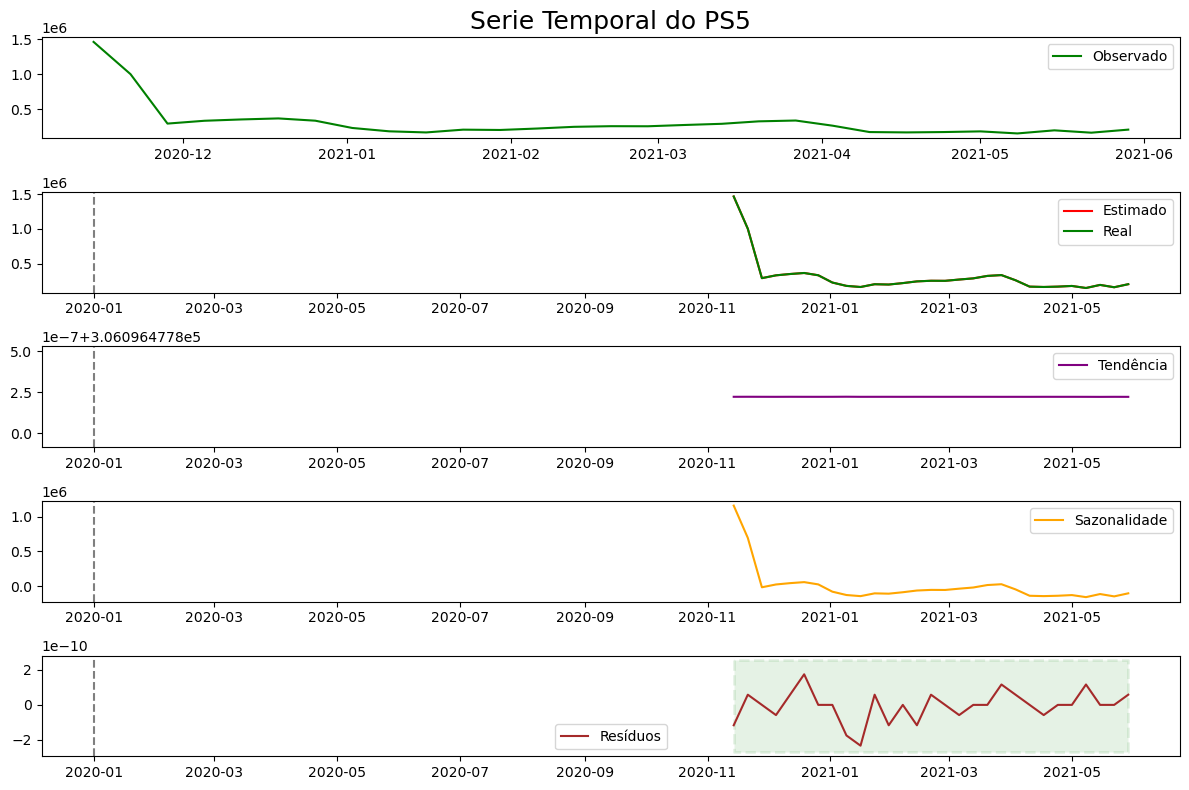

Teste de R2 (Erro quadratico Séries): 0.9289100149362038
Conclusão: Aproximação Boa


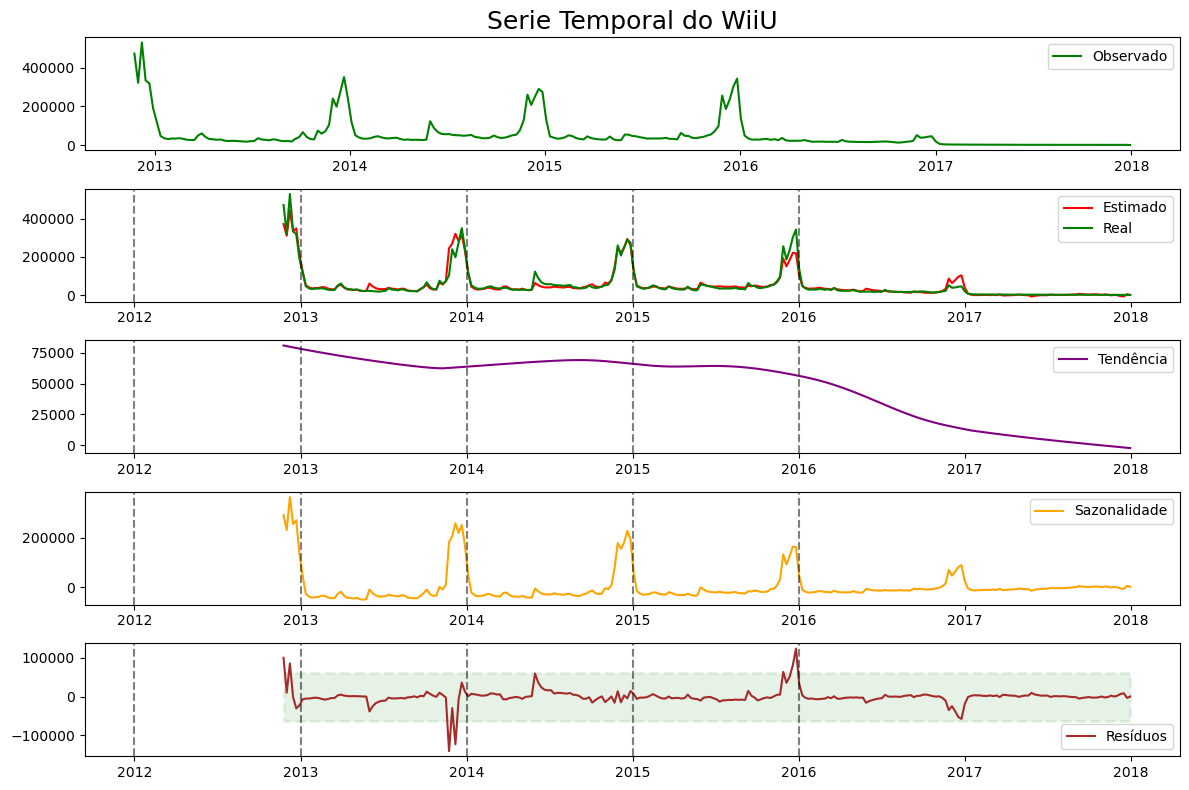

Teste de R2 (Erro quadratico Séries): 0.8584414206710985
Conclusão: Aproximação Boa


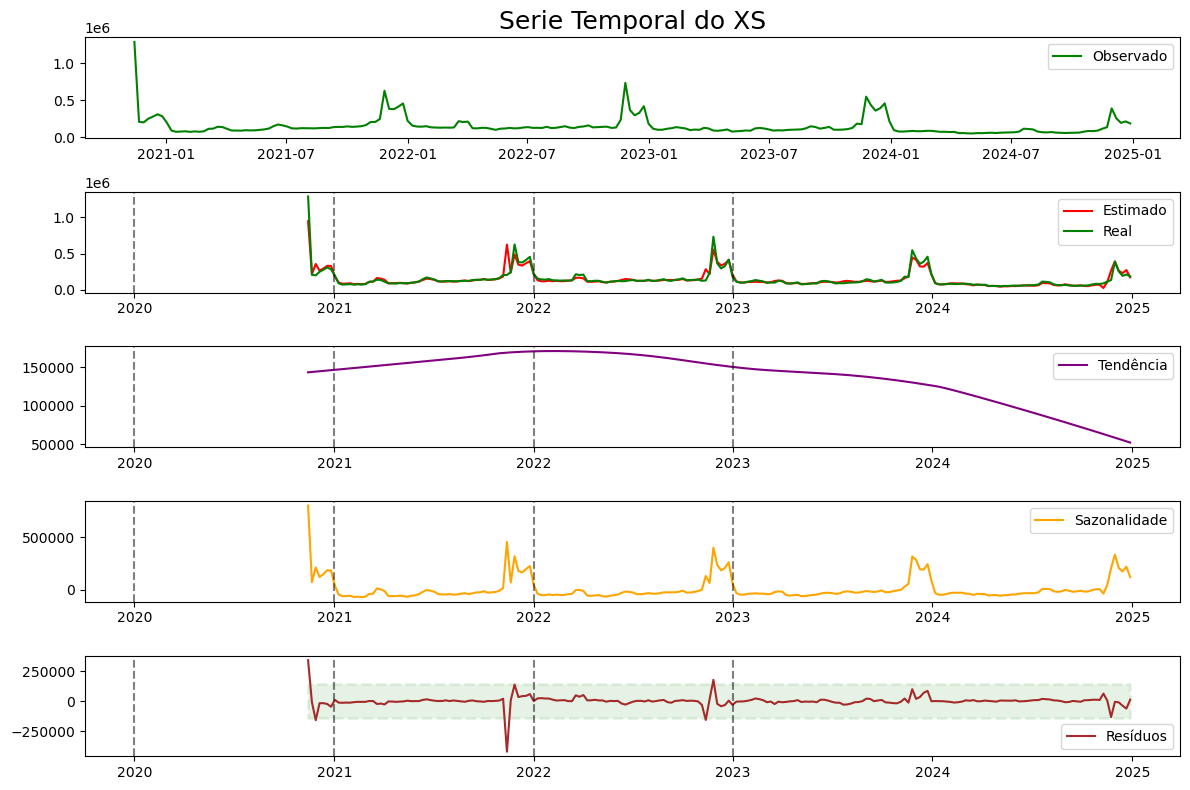

Teste de R2 (Erro quadratico Séries): 0.926430211649431
Conclusão: Aproximação Boa


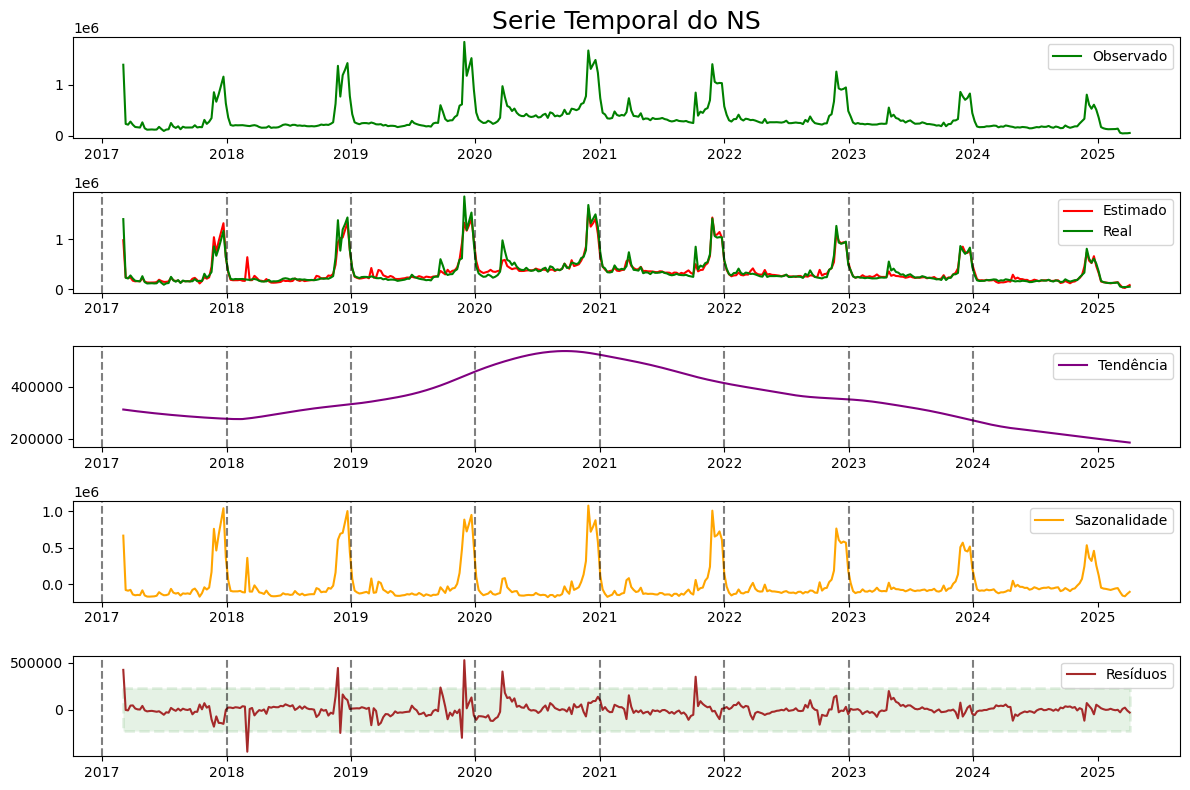

Teste de R2 (Erro quadratico Séries): 0.8869195827579259
Conclusão: Aproximação Boa


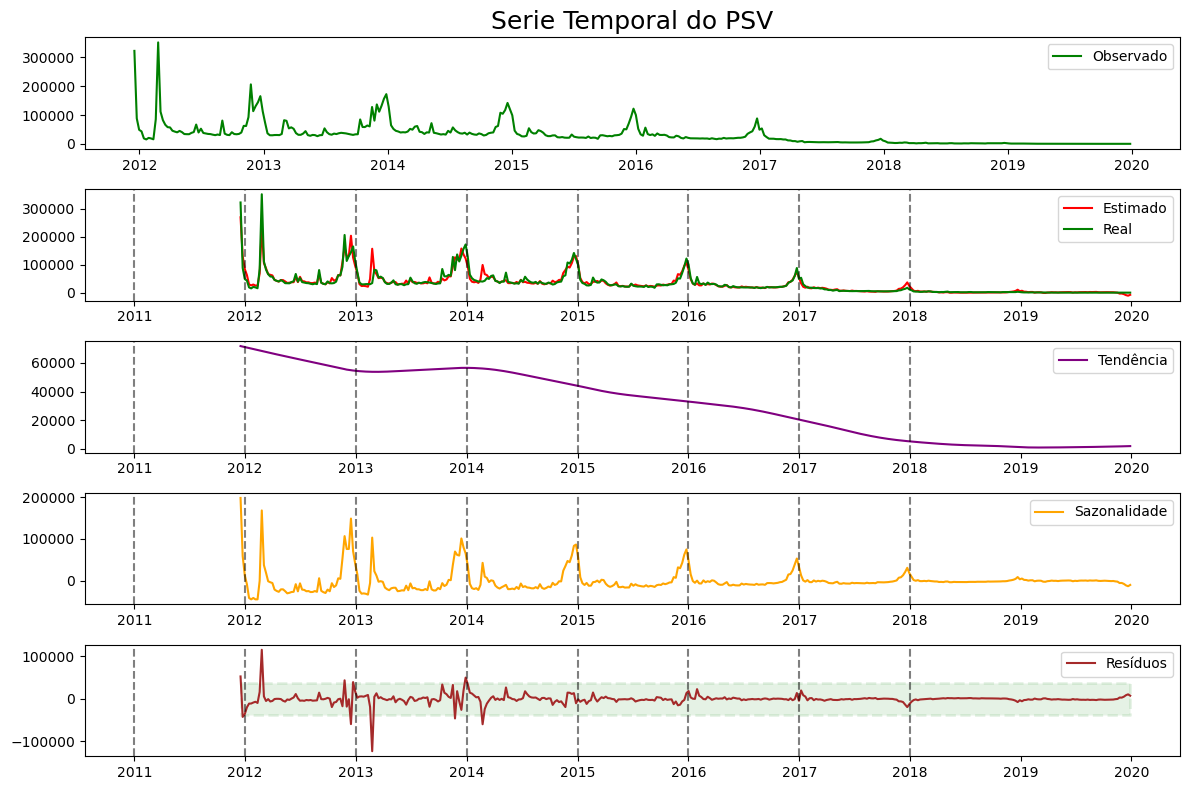

Teste de R2 (Erro quadratico Séries): 0.9204975069207201
Conclusão: Aproximação Boa


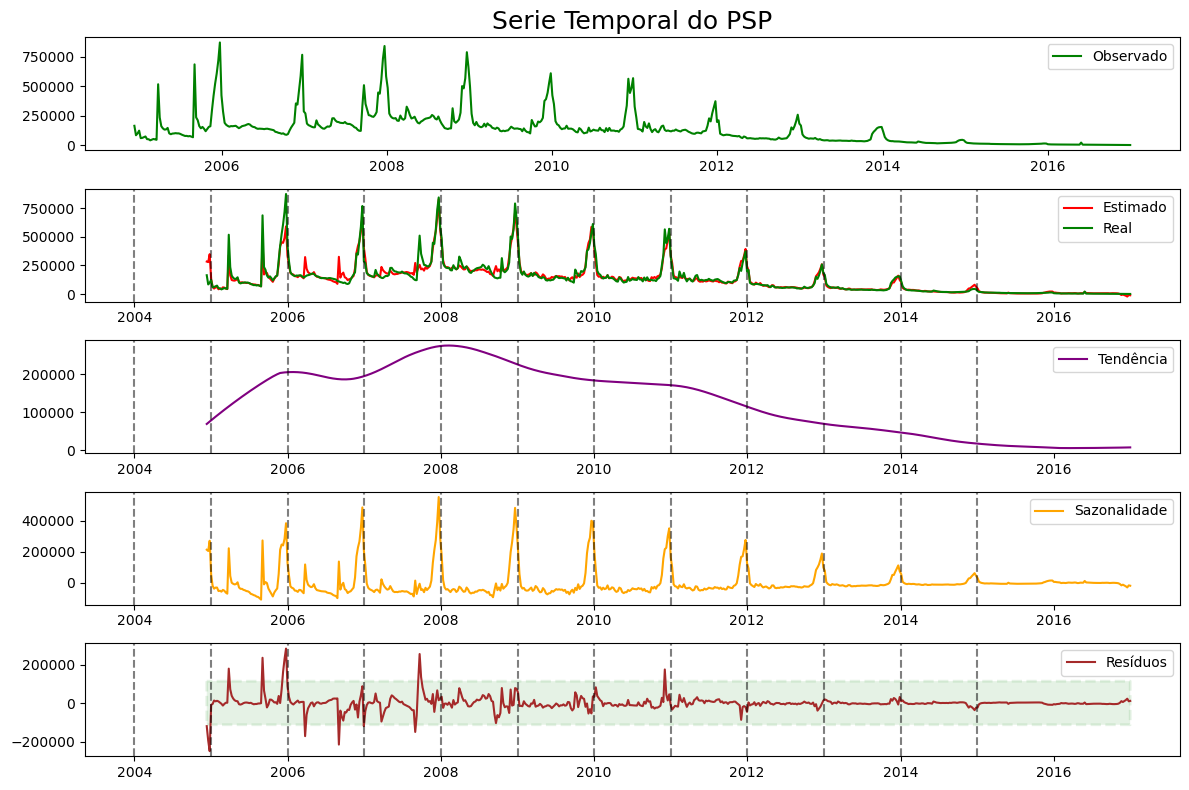

Teste de R2 (Erro quadratico Séries): 0.9144758846871105
Conclusão: Aproximação Boa


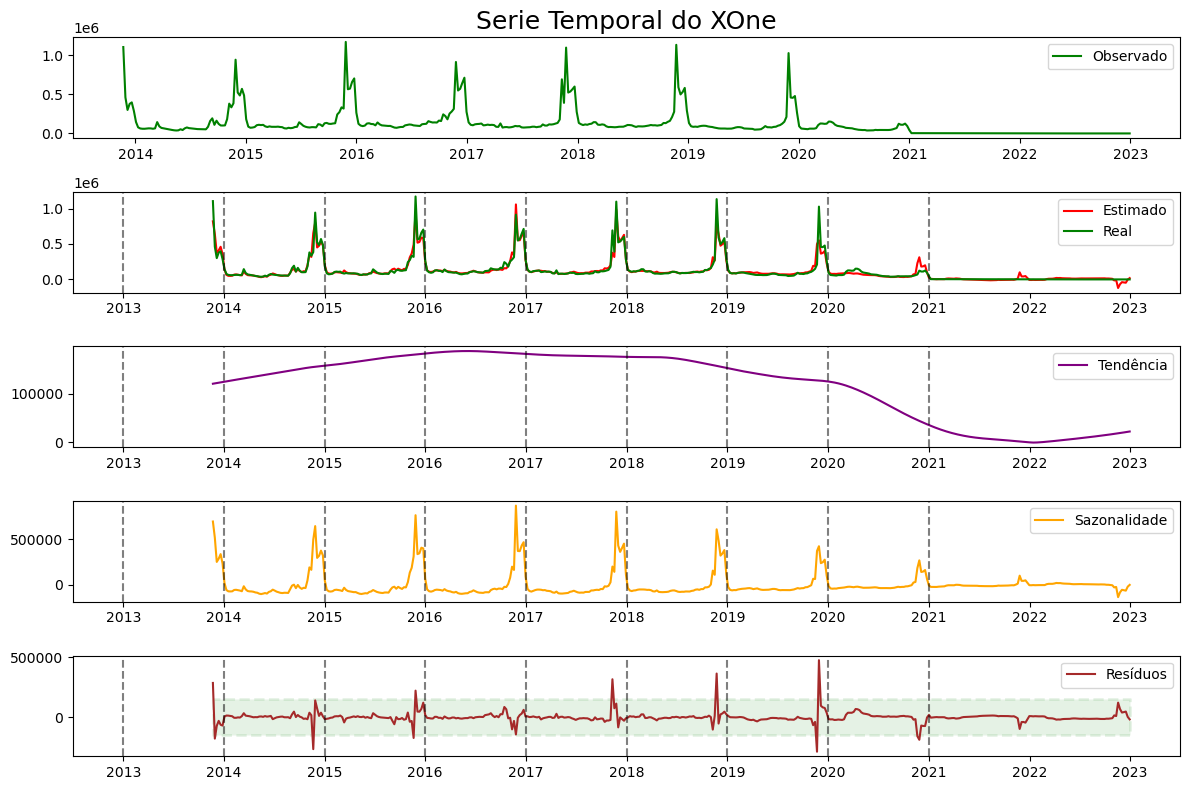

Teste de R2 (Erro quadratico Séries): 0.9438669331182399
Conclusão: Aproximação Boa


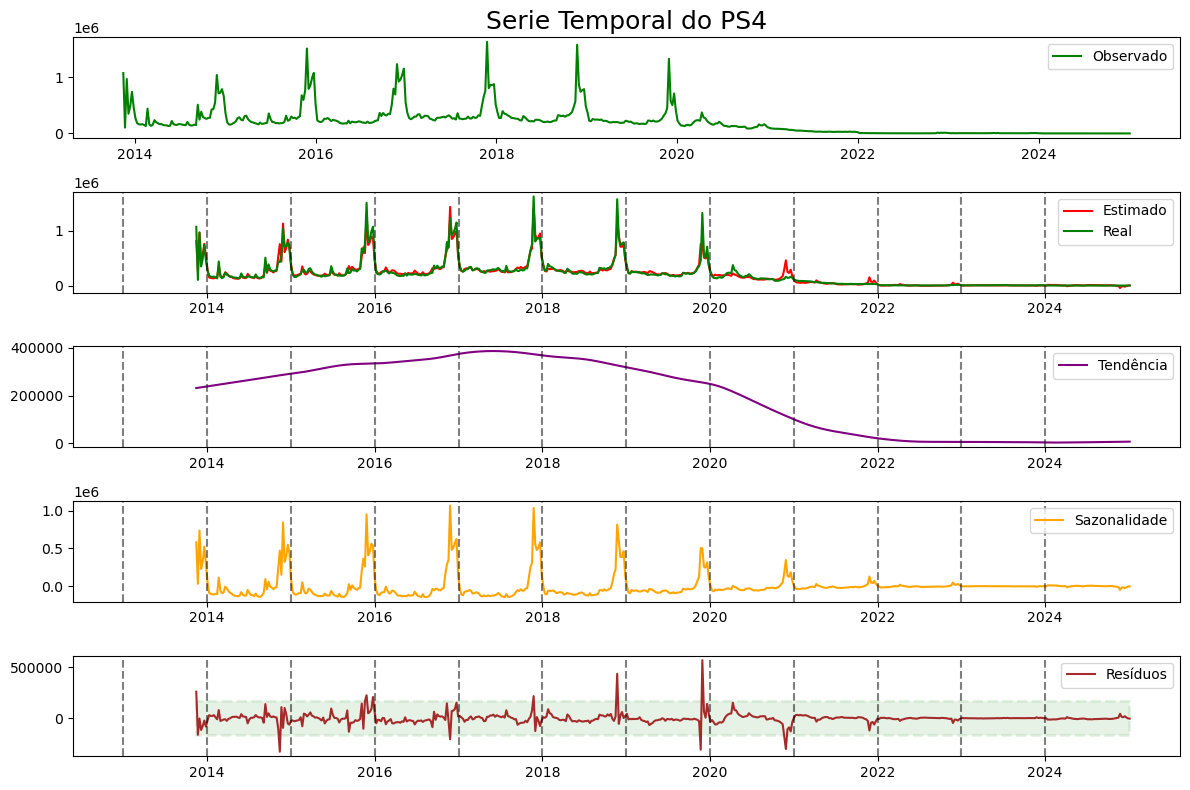

Teste de R2 (Erro quadratico Séries): 0.9630073495126636
Conclusão: Aproximação Boa


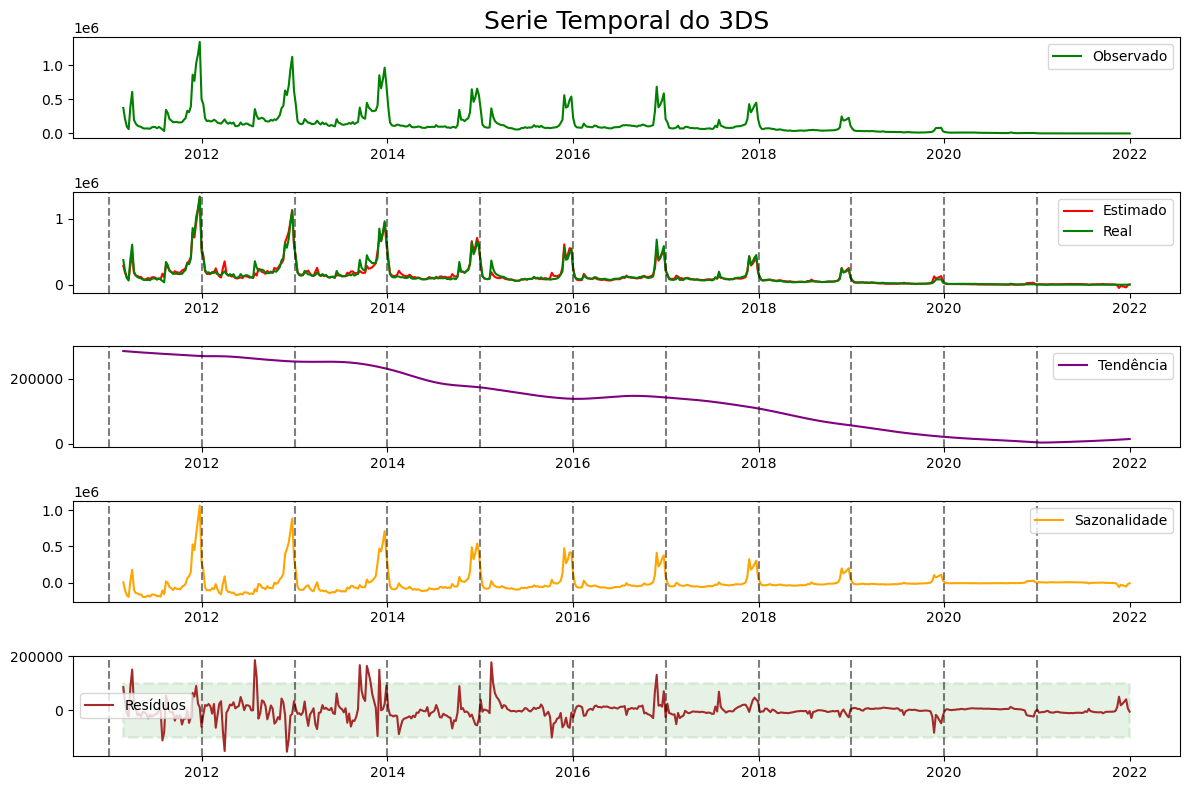

Teste de R2 (Erro quadratico Séries): 0.9591371993325335
Conclusão: Aproximação Boa


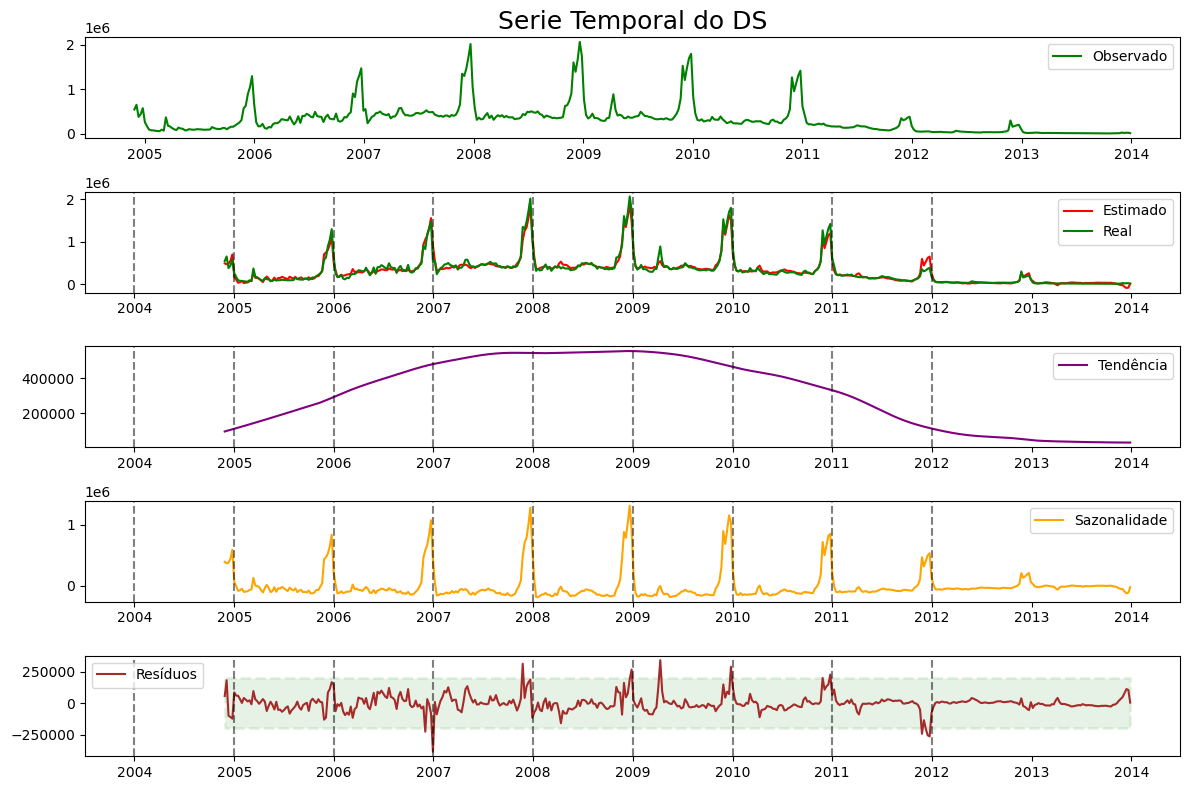

Teste de R2 (Erro quadratico Séries): 0.9495454388132581
Conclusão: Aproximação Boa


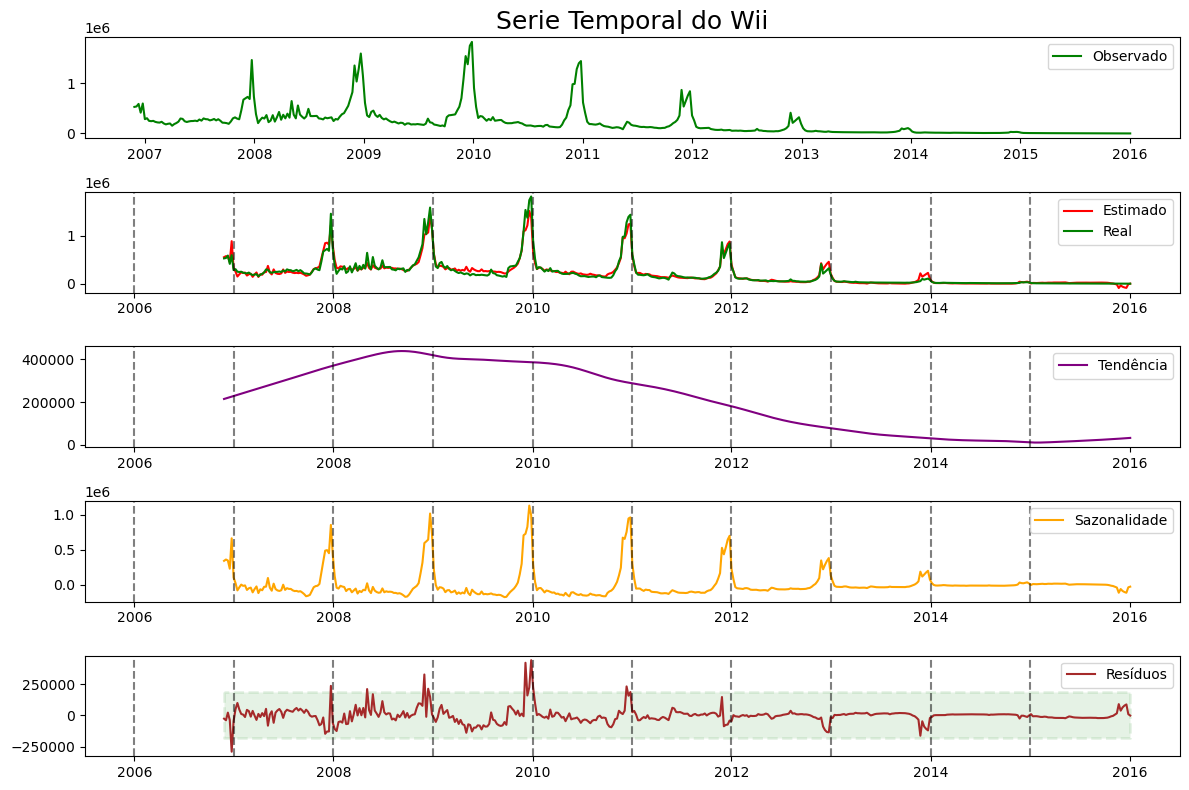

Teste de R2 (Erro quadratico Séries): 0.9479689010716212
Conclusão: Aproximação Boa


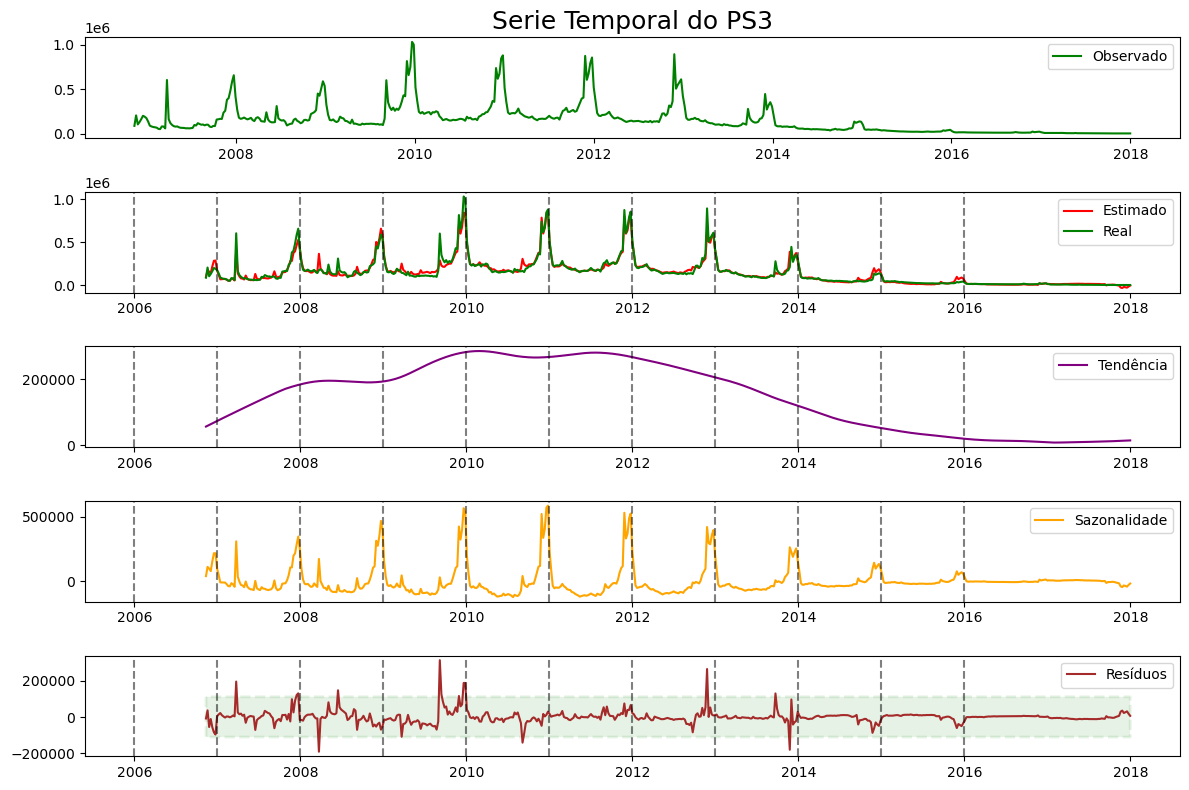

Teste de R2 (Erro quadratico Séries): 0.954073486830889
Conclusão: Aproximação Boa


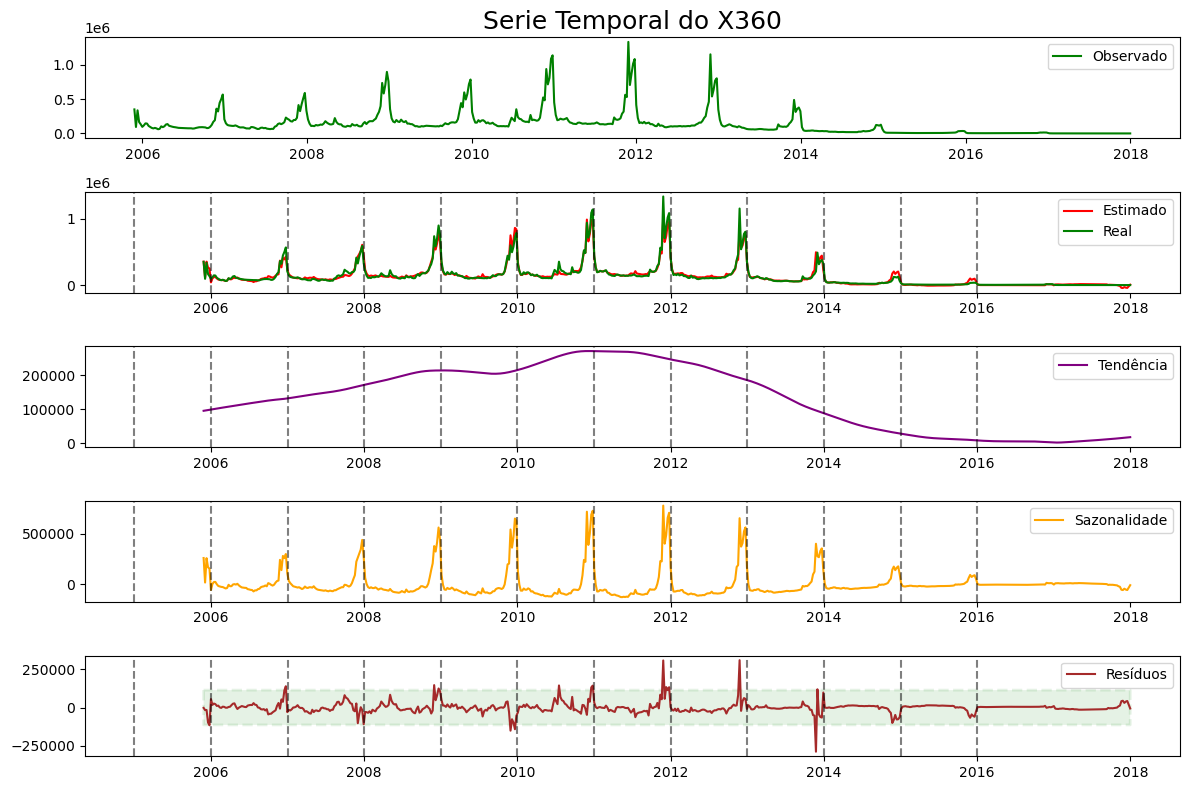

In [16]:
for console in consoles:
    actual_series = df[console].dropna()
    actual_series = actual_series[actual_series != 0]
    decomposition = STL(actual_series, period=52).fit()

    date_min = actual_series.index.min().year
    date_max = actual_series.index.max().year

    plt.figure(figsize=(12, 8))
    plt.subplot(511)
    plt.title(f'Serie Temporal do {console}', fontsize=18)
    plt.plot(actual_series,color='green', label='Observado')
    plt.legend()

    plt.subplot(512)
    ss_res = np.sum(decomposition.resid**2)                
    ss_tot = np.sum((actual_series - np.mean(actual_series))**2)  
    r2 = 1 - (ss_res / ss_tot)
    
    text_test = (
        f'Teste de R2 (Erro quadratico Séries): {r2}\n'
        f'Conclusão: {"Aproximação Insuficiente" if r2 < 0.8 else "Aproximação Boa"}'
    )
    
    print(text_test)
    estimated = decomposition.trend + decomposition.seasonal
    plt.plot(estimated, color='red', label='Estimado')
    plt.plot(actual_series, color='green', label='Real')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    plt.legend()
    
    plt.subplot(513)
    plt.plot(decomposition.trend, color='purple', label='Tendência')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    plt.legend()
    
    plt.subplot(514)
    plt.plot(decomposition.seasonal, color='orange', label='Sazonalidade')
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
    plt.legend()
    
    plt.subplot(515)
    resid = decomposition.resid
    resid_mu = resid.mean()
    resid_dev = resid.std()

    lower = resid_mu - (3*resid_dev)
    upper = resid_mu + (3*resid_dev)
    plt.plot(resid, color='brown', label='Resíduos')
    plt.fill_between(resid.index,lower, upper, color='g', alpha=0.1, linestyle='--', linewidth=2)
    for year in range(date_min,date_max):
        plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)

    plt.legend()
    
    
    plt.tight_layout()
    plt.show()
    